# Changing colorspace and simple segmentation

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html#converting-colorspaces

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter('ignore')

import gc

from os import path
import sys
sys.path.append(path.abspath('..'))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

from src.config import DATA_PATH
from src.utils import plot_images, plot_statistics


# Palm

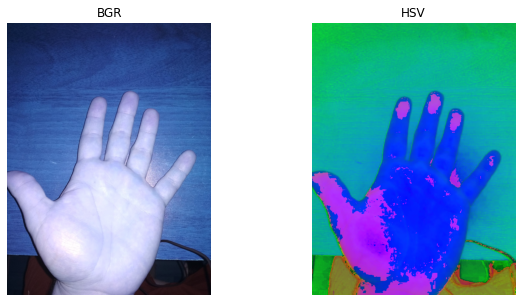

In [4]:
image = cv2.imread(path.join(DATA_PATH, "palm.jpg"))
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plot_images([image, image_hsv], names=["BGR", "HSV"], figsize=(10, 5))

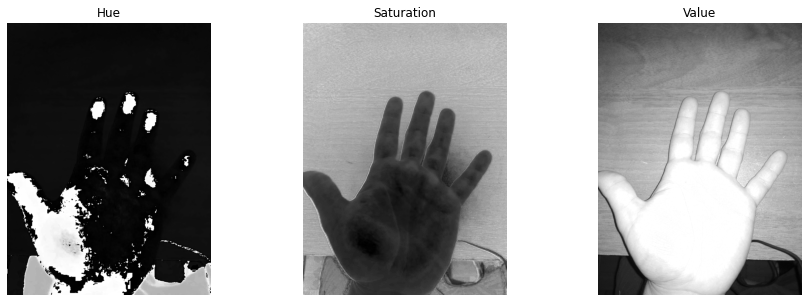

In [5]:
plot_images([image_hsv[:,:,0], image_hsv[:,:,1], image_hsv[:,:,2]], names=["Hue", "Saturation", "Value"],
            figsize=(15, 5), imshow_kwargs={"cmap":plt.cm.gray})

In [6]:
# Color values in any points
print(image[800, 200])
print(image[800, 400])

[236 227 254]
[226 230 254]


In [7]:
palm_color = np.uint8([[[236, 227, 254]]])
palm_color_hsv = cv2.cvtColor(palm_color, cv2.COLOR_BGR2HSV)
print(palm_color_hsv)

palm_color = np.uint8([[[226, 230, 254]]])
palm_color_hsv = cv2.cvtColor(palm_color, cv2.COLOR_BGR2HSV)
print(palm_color_hsv)

[[[170  27 254]]]
[[[  4  28 254]]]


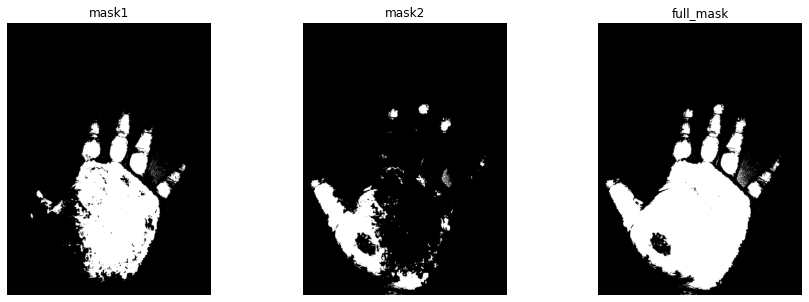

In [8]:
lower_threshold = np.array([0, 0, 240])
upper_threshold = np.array([14, 100, 255])
mask1 = cv2.inRange(image_hsv, lower_threshold, upper_threshold)

lower_threshold = np.array([160, 0, 230])
upper_threshold = np.array([180, 100, 255])
mask2 = cv2.inRange(image_hsv, lower_threshold, upper_threshold)

full_mask = cv2.bitwise_or(mask1, mask2)

plot_images([mask1, mask2, full_mask], names=["mask1", "mask2", "full_mask"], figsize=(15, 5),
            imshow_kwargs={"cmap": plt.cm.gray})

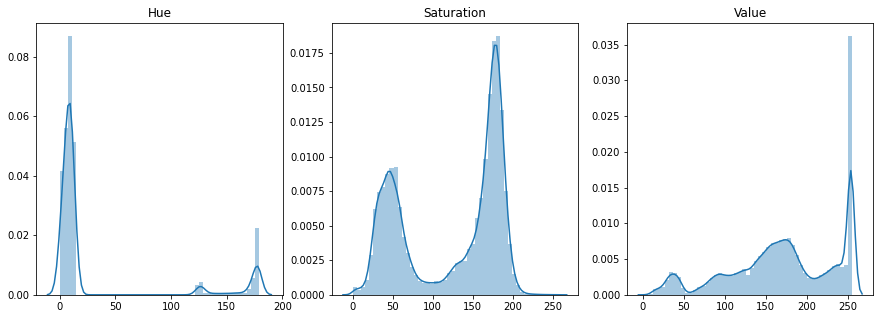

In [9]:
# Value distribution on HSV
plot_statistics([image_hsv[:, :, 0], image_hsv[:, :, 1], image_hsv[:, :, 2]], figsize=(15, 5),
                names=["Hue", "Saturation", "Value"])

# Notebook

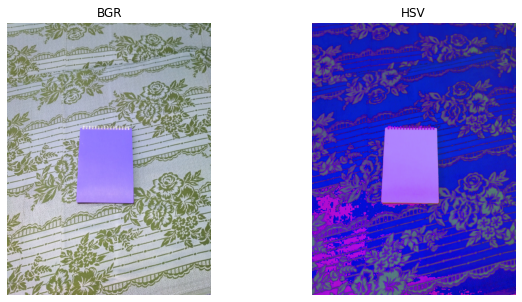

In [10]:
image = cv2.imread(path.join(DATA_PATH, "notebook.jpg"))
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plot_images([image, image_hsv], names=["BGR", "HSV"], figsize=(10, 5))

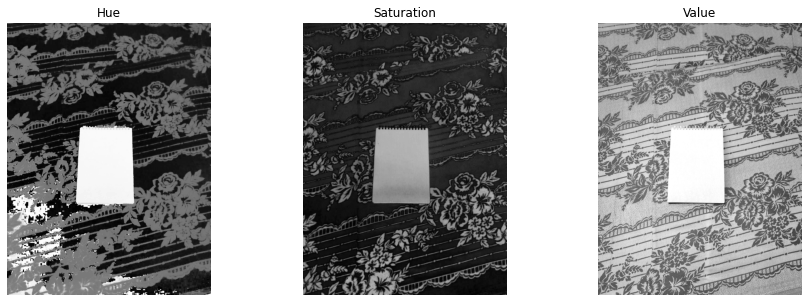

In [11]:
plot_images([image_hsv[:,:,0], image_hsv[:,:,1], image_hsv[:,:,2]], names=["Hue", "Saturation", "Value"],
            figsize=(15, 5), imshow_kwargs={"cmap":plt.cm.gray})

In [12]:
# Get color value
print(image[1000, 700])

[143 117 247]


In [13]:
palm_color = np.uint8([[[143, 117, 247]]])
palm_color_hsv = cv2.cvtColor(palm_color, cv2.COLOR_BGR2HSV)
print(palm_color_hsv)

[[[174 134 247]]]


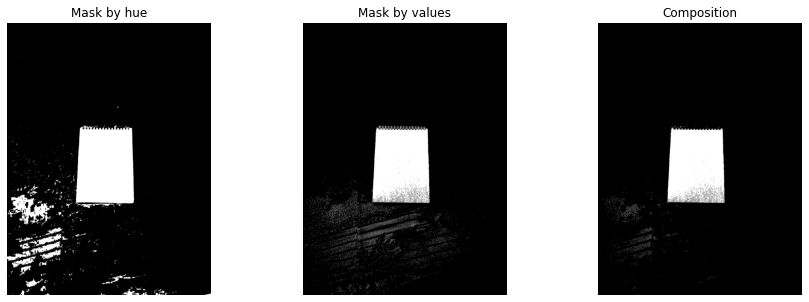

In [14]:
lower_threshold = np.array([169, 0, 0])
upper_threshold = np.array([184, 255, 255])
mask_h = cv2.inRange(image_hsv, lower_threshold, upper_threshold)

lower_threshold = np.array([0, 0, 245])
upper_threshold = np.array([255, 255, 255])
mask_v = cv2.inRange(image_hsv, lower_threshold, upper_threshold)

composition_mask = cv2.bitwise_and(mask_h, mask_v)

plot_images([mask_h, mask_v, composition_mask], names=["Mask by hue", "Mask by values", "Composition"],
            figsize=(15, 5), imshow_kwargs={"cmap": plt.cm.gray})

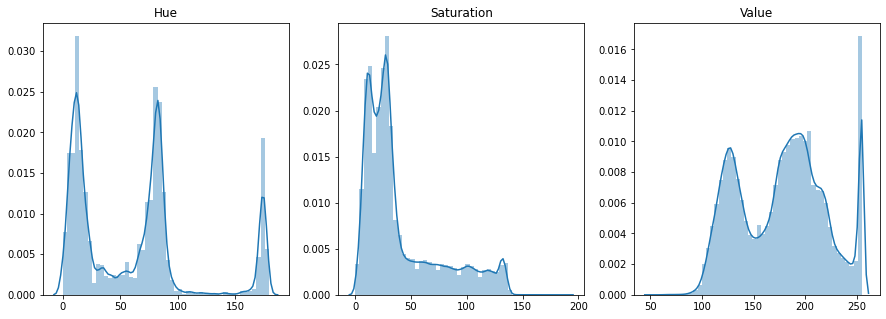

In [15]:
# Value distribution on HSV
plot_statistics([image_hsv[:, :, 0], image_hsv[:, :, 1], image_hsv[:, :, 2]], figsize=(15, 5),
                names=["Hue", "Saturation", "Value"])